In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# get up to date model , for now model of 26 topics on 40k data is gotten.
from load_variables import load_data
processed_data, bow_corpus, id2word, lda_model = load_data()

In [3]:
dictionary = processed_data['body'].to_numpy().tolist()

In [4]:
dictionary[0:4]

[['सर्वोच्च',
  'अदालत',
  'प्रस्तावित',
  'न्यायाधीश',
  'अब्दुल',
  'अजिज',
  'मुसलमान',
  'शुक्रबार',
  'संसदीय',
  'सुनुवाइ',
  'समिति',
  'न्यायाधीश',
  'सुनुवाइ',
  'पुग',
  'नेपाली',
  'कांग्रेस',
  'सांसद',
  'रमेश',
  'लेखक',
  'मुद्',
  'चाप',
  'घटाउ',
  'प्रश्न',
  'प्रस्तावित',
  'न्यायाधीश',
  'अब्दुल',
  'अजिज',
  'रोचक',
  'जवाफ',
  'न्यायाधीश',
  'न्यायाधीश',
  'इजलास',
  'मुद्',
  'लाग्',
  'बजेसम्म',
  'कजलिस्ट',
  'लागे',
  'मुद्',
  'चाप',
  'घट्',
  'अल्छी',
  'गर्नुभएन',
  'पन्छाउ',
  'मेहनत',
  'त्यसरी',
  'मुद्',
  'घटाउन',
  'समिति',
  'जेष्ठ',
  'सदस्य',
  'हैसियत',
  'बैठक',
  'अध्यक्षता',
  'सांसद',
  'ज्ञानेन्द्र',
  'बहादुर',
  'कार्की',
  'अदालत',
  'मुद्',
  'संख्या',
  'छिटो',
  'टुङ्ग्याउन',
  'सोधे',
  'न्यायाधीश',
  'अजिज',
  'उदाहरणसहित',
  'जवाफ',
  'क्रोध',
  'लोभ',
  'मोह',
  'जीवन',
  'आयाम',
  'छाडेर',
  'परिवार',
  'समाज',
  'राष्ट्र',
  'परिवर्तन',
  'देश',
  'जरूरी',
  'न्यायालय',
  'क्षेत्र',
  'मुद्',
  'त्यसै',
  'कोरोना',
  'समस्या',
  

In [5]:
print(len(bow_corpus))
print(len(bow_corpus[0]))
print(len(dictionary[0]))

38947
146
321


In [6]:
# id2word.token2id

In [7]:
# testing part for plotting documents in 2d:
topic_dis = [lda_model.get_document_topics(bow,minimum_probability=0.0) for bow in bow_corpus]

In [8]:
topic_dis[0]

[(0, 0.0001516564),
 (1, 0.0001516564),
 (2, 0.0001516564),
 (3, 0.42634442),
 (4, 0.0001516564),
 (5, 0.0042806417),
 (6, 0.0001516564),
 (7, 0.0001516564),
 (8, 0.11567589),
 (9, 0.050085515),
 (10, 0.0001516564),
 (11, 0.027245365),
 (12, 0.0001516564),
 (13, 0.17176668),
 (14, 0.0001516564),
 (15, 0.0001516564),
 (16, 0.0001516564),
 (17, 0.0001516564),
 (18, 0.0001516564),
 (19, 0.0001516564),
 (20, 0.0001516564),
 (21, 0.15141423),
 (22, 0.042144258),
 (23, 0.008464867),
 (24, 0.0001516564),
 (25, 0.0001516564)]

In [9]:
len(topic_dis)

38947

In [10]:
topic_probs = [[prob for _, prob in dist] for dist in topic_dis]

In [11]:
topic_probs[0]

[0.0001516564,
 0.0001516564,
 0.0001516564,
 0.42634442,
 0.0001516564,
 0.0042806417,
 0.0001516564,
 0.0001516564,
 0.11567589,
 0.050085515,
 0.0001516564,
 0.027245365,
 0.0001516564,
 0.17176668,
 0.0001516564,
 0.0001516564,
 0.0001516564,
 0.0001516564,
 0.0001516564,
 0.0001516564,
 0.0001516564,
 0.15141423,
 0.042144258,
 0.008464867,
 0.0001516564,
 0.0001516564]

In [12]:
np_topic_probs = np.asarray(topic_probs)

In [13]:
np_topic_probs.shape

(38947, 26)

In [14]:
topic_assignment = np_topic_probs.argmax(axis=1)
topic_assignment

array([ 3,  3,  3, ..., 14, 10, 20])

In [15]:
lda_model.num_topics

26

In [16]:
print(len(topic_probs))
print(len(topic_probs[0]))

38947
26


In [38]:
# for topic_prob in topic_probs:
#     val = max(topic_prob)
#     minval = min(topic_prob)
#     if val>0.99:
#         print(val)
#     if minval < 0.00001:
#         print(minval)

In [17]:
import umap
reducer = umap.UMAP(n_components=2,random_state=42)

/home/avisek/work/final-year-project/topic_modeling/env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-04-10 09:46:24.869788: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-10 09:46:24.870033: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-10 09:46:24.930826: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-10 09:46:25.077319: I tensorflow/core/platform/cpu_feature_guard.cc

In [18]:
embedding = reducer.fit_transform(topic_probs)

/home/avisek/work/final-year-project/topic_modeling/env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [19]:
print(embedding.shape)
print('--------------')
print(embedding)

(38947, 2)
--------------
[[ 9.295155   6.635925 ]
 [ 9.295208   6.6379704]
 [ 9.165322   5.840272 ]
 ...
 [ 7.357417  13.6418295]
 [10.659339  10.792896 ]
 [ 9.12187    8.816845 ]]


In [20]:
# For finding the minimum and maximum values.
print(np.min(embedding[:,0]))
print(np.min(embedding[:,1]))
print(np.max(embedding[:,0]))
print(np.max(embedding[:,1]))

-4.412747
-4.1915417
20.533907
23.798532


In [153]:
# color_array = plt.cm.viridis(np.linspace(0,1,26))
# color_array[0]

In [21]:
# color_assignment = color_array[topic_assignment]
# FOR NOW : 26 topics so 26 unique colors, ( generate this by LLM like ChatGPT )
unique_colors =  ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown',
                               'pink', 'gray', 'olive', 'cyan', 'lime', 'teal', 'indigo', 'maroon',
                               'navy', 'peru', 'orchid', 'turquoise', 'sienna', 'slateblue', 'darkred','gold']

In [22]:
len(unique_colors)

26

In [23]:
print(topic_assignment.shape)
print(topic_assignment)

(38947,)
[ 3  3  3 ... 14 10 20]


In [24]:
np.unique(topic_assignment).shape

(26,)

In [25]:
num_topics = lda_model.num_topics
topics_representation = []
for i in range(num_topics):
    topic_words = lda_model.show_topic(i)
    topics_representation.append(str(i) + '_' + '_'.join([i[0] for i in topic_words[0:4]]))

In [26]:
topics_representation

['0_महाधिवेशन_उम्मेदवार_कोइराला_विधान',
 '1_कमिटी_स्थायी_एकता_गठबन्धन',
 '2_मुख्यमन्त्री_गठबन्धन_शाही_मतदान',
 '3_न्यायाधीश_सर्वोच्च_आदेश_इजलास',
 '4_विधेयक_संशोधन_पारित_कानुन',
 '5_कर्मचारी_सेवा_समायोजन_राप्रपा',
 '6_यादव_एमसिसी_जसपा_राउत',
 '7_सभामुख_विघटन_अध्यादेश_विश्वास',
 '8_गाडी_सवारी_सडक_प्रयोग',
 '9_मुद्_फैसला_सर्वोच्च_सजाय',
 '10_बजेट_करोड_खर्च_योजना',
 '11_भारत_चीन_भूमि_सम्बन्ध',
 '12_घटना_विप्लव_पक्राउ_वडा',
 '13_आयोजना_कम्पनी_विमानस्थल_सडक',
 '14_अनुसन्धान_पक्राउ_मुद्_छानबिन',
 '15_अमेरि_अमेरिका_चीन_ट्रम्प',
 '16_खोप_गुठी_गिरी_प्रतिष्ठान',
 '17_मुलुक_बोल्_आन्दोलन_लोकतन्त्र',
 '18_विद्यार्_शिक्षा_केसी_कलेज',
 '19_कोरोना_महामारी_स्वास्थ्य_भाइरस',
 '20_भ्रमण_राजदूत_सम्मेलन_परराष्ट्र',
 '21_नागरिकता_महिला_भनिन्_कानुन',
 '22_जग्गा_अख्तियार_बाँस्कोटा_मन्त्रिपरिषद',
 '23_कोरोना_परीक्षण_संक्रमण_स्वास्थ्य',
 '24_पोखरेल_कमिटी_राजधानी_सचिव',
 '25_अस्पताल_स्वास्थ्य_उपचार_भवन']

In [27]:
lda_model.show_topic(25)

[('अस्पताल', 0.055308636),
 ('स्वास्थ्य', 0.02700804),
 ('उपचार', 0.02570922),
 ('भवन', 0.013919051),
 ('निधन', 0.011453106),
 ('बिरामी', 0.009812147),
 ('चिकित्सक', 0.009259768),
 ('सेवा', 0.0079051545),
 ('भर्ना', 0.006509989),
 ('मिर्गौला', 0.0060565383)]

In [28]:
from matplotlib.font_manager import FontProperties
font_path = "../resources/Mangal.ttf"
# font_path = "../resources/agra.ttf"

font = FontProperties(fname=font_path)

/tmp/ipykernel_4755/1696306605.py:15: UserWarning: Glyph 108 (l) missing from current font.
  plt.savefig('./results/topic_distribution_of_40k_data.png',
/tmp/ipykernel_4755/1696306605.py:15: UserWarning: Glyph 112 (p) missing from current font.
  plt.savefig('./results/topic_distribution_of_40k_data.png',
/home/avisek/work/final-year-project/topic_modeling/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/avisek/work/final-year-project/topic_modeling/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


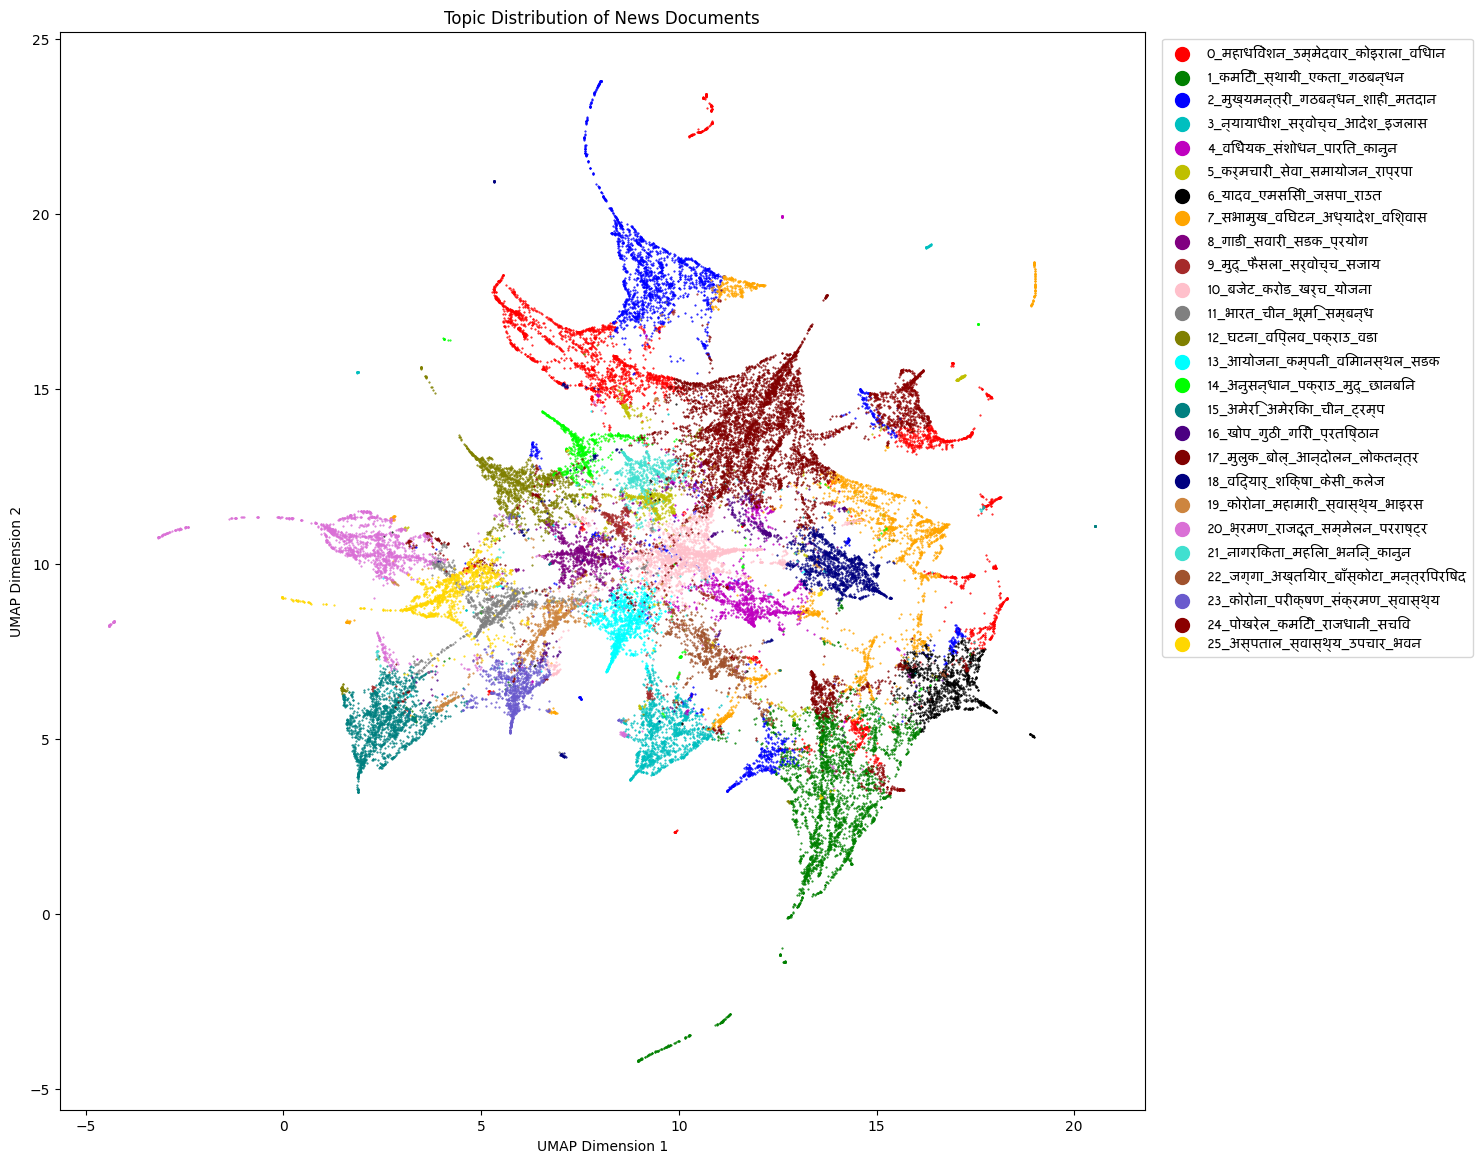

In [29]:
fig, ax = plt.subplots(figsize=(14,14))
for i in np.unique(topic_assignment):
    ix = np.where(topic_assignment==i)
    x_values = embedding[:, 0][ix]
    y_values = embedding[:, 1][ix]
    color = unique_colors[i]
    label = topics_representation[i]
    ax.scatter(x_values,y_values,s=0.25,c=color,label=label)
# ax.legend(markerscale=2)
ax.legend(bbox_to_anchor=(1.01, 1), markerscale=20,prop=font)
plt.title('Topic Distribution of News Documents')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
# save image to folder
plt.savefig('./results/topic_distribution_of_40k_data.png',
            bbox_inches='tight')
plt.show()

In [93]:
# applying k means for clustering in the topics
embedding

array([[ 9.295155 ,  6.635925 ],
       [ 9.295208 ,  6.6379704],
       [ 9.165322 ,  5.840272 ],
       ...,
       [ 7.357417 , 13.6418295],
       [10.659339 , 10.792896 ],
       [ 9.12187  ,  8.816845 ]], dtype=float32)

In [98]:
embedding[:,0][[1,2,-1]]

array([9.295208, 9.165322, 9.12187 ], dtype=float32)

In [104]:
centroid_of_each_topic = {}
for i in np.unique(topic_assignment):
    ix = np.where(topic_assignment==i)
    x_values = embedding[:, 0][ix]
    y_values = embedding[:, 1][ix]
    # print(i)
    # print(x_values)
    # print(x_values.shape)
    # print(y_values.shape)
    # print(type(x_values))
    centroid_of_each_topic[i] = (np.mean(x_values),np.mean(y_values))

In [107]:
d = {1:2,3:4}
for i,j in d.items():
    print(i,j)

1 2
3 4


In [146]:
x_values = [val[0] for _, val in centroid_of_each_topic.items()]
y_values = [val[1] for _, val in centroid_of_each_topic.items()]
print(x_values)
print(y_values)

[10.887923, 13.62676, 10.26486, 9.692476, 11.667892, 10.143454, 16.539661, 14.061095, 7.7520847, 9.10291, 10.200397, 5.5661516, 5.992594, 8.585548, 8.041095, 2.8189917, 10.935088, 11.874704, 13.482526, 6.611047, 2.3782988, 8.938299, 10.817738, 5.8783774, 14.087412, 4.4417586]
[13.936025, 3.3319519, 14.888388, 5.7537603, 9.440963, 11.902293, 6.640033, 10.936273, 10.3848295, 10.34107, 10.183769, 8.951921, 11.988859, 8.310486, 12.982217, 5.553499, 10.539099, 12.998831, 9.985393, 8.390325, 10.133897, 12.1944275, 7.469295, 6.481916, 12.371215, 9.144696]


Text(0, 0.5, 'Topic Centroid - Y coordinate')

findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not

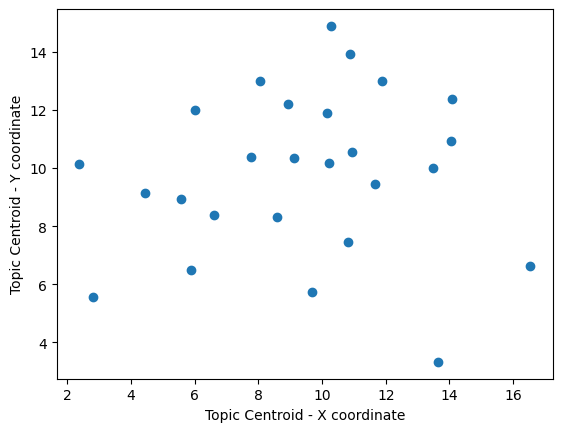

In [115]:
plt.scatter(x_values,y_values)
plt.xlabel('Topic Centroid - X coordinate')
plt.ylabel('Topic Centroid - Y coordinate')

In [117]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [119]:
data = np.column_stack((x_values, y_values))

In [120]:
km = KMeans(n_clusters=3,random_state=42)
y_predicted = km.fit_predict(data)
y_predicted

/home/avisek/work/final-year-project/topic_modeling/env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 0, 2, 0, 2, 2, 0, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2,
       0, 1, 2, 1], dtype=int32)

In [149]:
x_values = np.array(x_values)
y_values = np.array(y_values)

In [125]:
x_values

array([10.887923 , 13.62676  , 10.26486  ,  9.692476 , 11.667892 ,
       10.143454 , 16.539661 , 14.061095 ,  7.7520847,  9.10291  ,
       10.200397 ,  5.5661516,  5.992594 ,  8.585548 ,  8.041095 ,
        2.8189917, 10.935088 , 11.874704 , 13.482526 ,  6.611047 ,
        2.3782988,  8.938299 , 10.817738 ,  5.8783774, 14.087412 ,
        4.4417586], dtype=float32)

In [169]:
def get_clustered_points():
    x_values_by_cluster = []
    y_values_by_cluster = []
    for i in range(km.n_clusters):
        cluster_points = np.where(y_predicted==i)[0]
        x_values_by_cluster.append(x_values[cluster_points])
        y_values_by_cluster.append(y_values[cluster_points])
    return x_values_by_cluster,y_values_by_cluster
    

In [197]:
# colors = np.random.rand(km.n_clusters, 3)
colors = ['r','g','b']

Text(0, 0.5, 'Topic Centroid - Y coordinate')

findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not

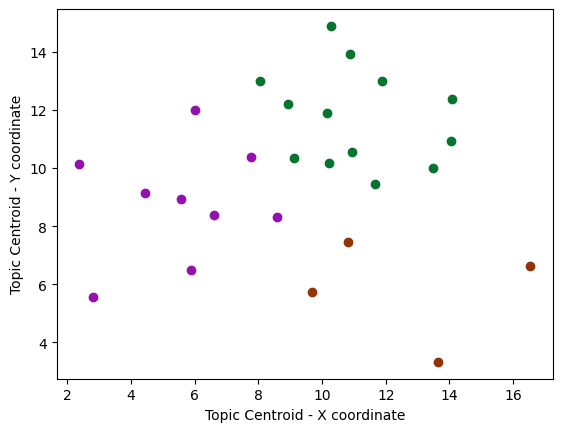

In [140]:
x_values_by_cluster,y_values_by_cluster = get_clustered_points()
for i in range(km.n_clusters):
    plt.scatter(x_values_by_cluster[i],y_values_by_cluster[i],color = colors[i])

# for i, (x, y) in enumerate(zip(x_values, y_values)):
#     plt.text(x, y, str(i), fontsize=12, ha='center', va='center')
plt.xlabel('Topic Centroid - X coordinate')
plt.ylabel('Topic Centroid - Y coordinate')

In [184]:
# now preprocessing my scaler
scaler = MinMaxScaler()

x_values = scaler.fit_transform(x_values.reshape(-1,1))

y_values= scaler.fit_transform(y_values.reshape(-1,1))

In [185]:
x_values[0:5]

array([[0.60090435],
       [0.7943064 ],
       [0.55690694],
       [0.5164882 ],
       [0.65598166]], dtype=float32)

Text(0, 0.5, 'Topic Centroid - Y coordinate')

findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not

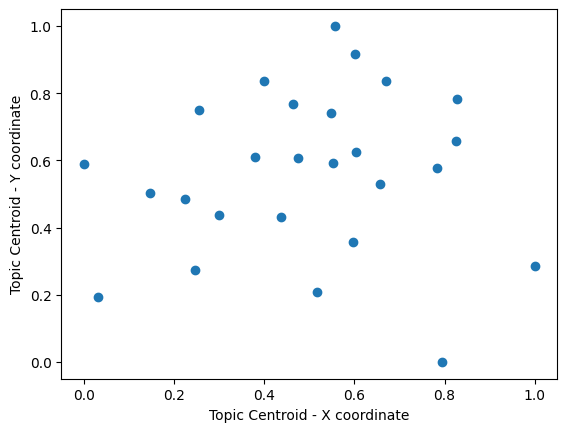

In [186]:
plt.scatter(x_values, y_values)
plt.xlabel('Topic Centroid - X coordinate')
plt.ylabel('Topic Centroid - Y coordinate')

In [187]:
data = np.column_stack((x_values, y_values))

In [188]:
data[0:3]

array([[0.60090435, 0.91759026],
       [0.7943064 , 0.        ],
       [0.55690694, 1.        ]], dtype=float32)

In [189]:
km = KMeans(n_clusters=3, random_state=42)
y_predicted = km.fit_predict(data)
y_predicted

/home/avisek/work/final-year-project/topic_modeling/env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 2, 1, 2, 1, 1, 2, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       2, 0, 1, 0], dtype=int32)

Text(0, 0.5, 'Topic Centroid - Y coordinate')

findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.


findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not

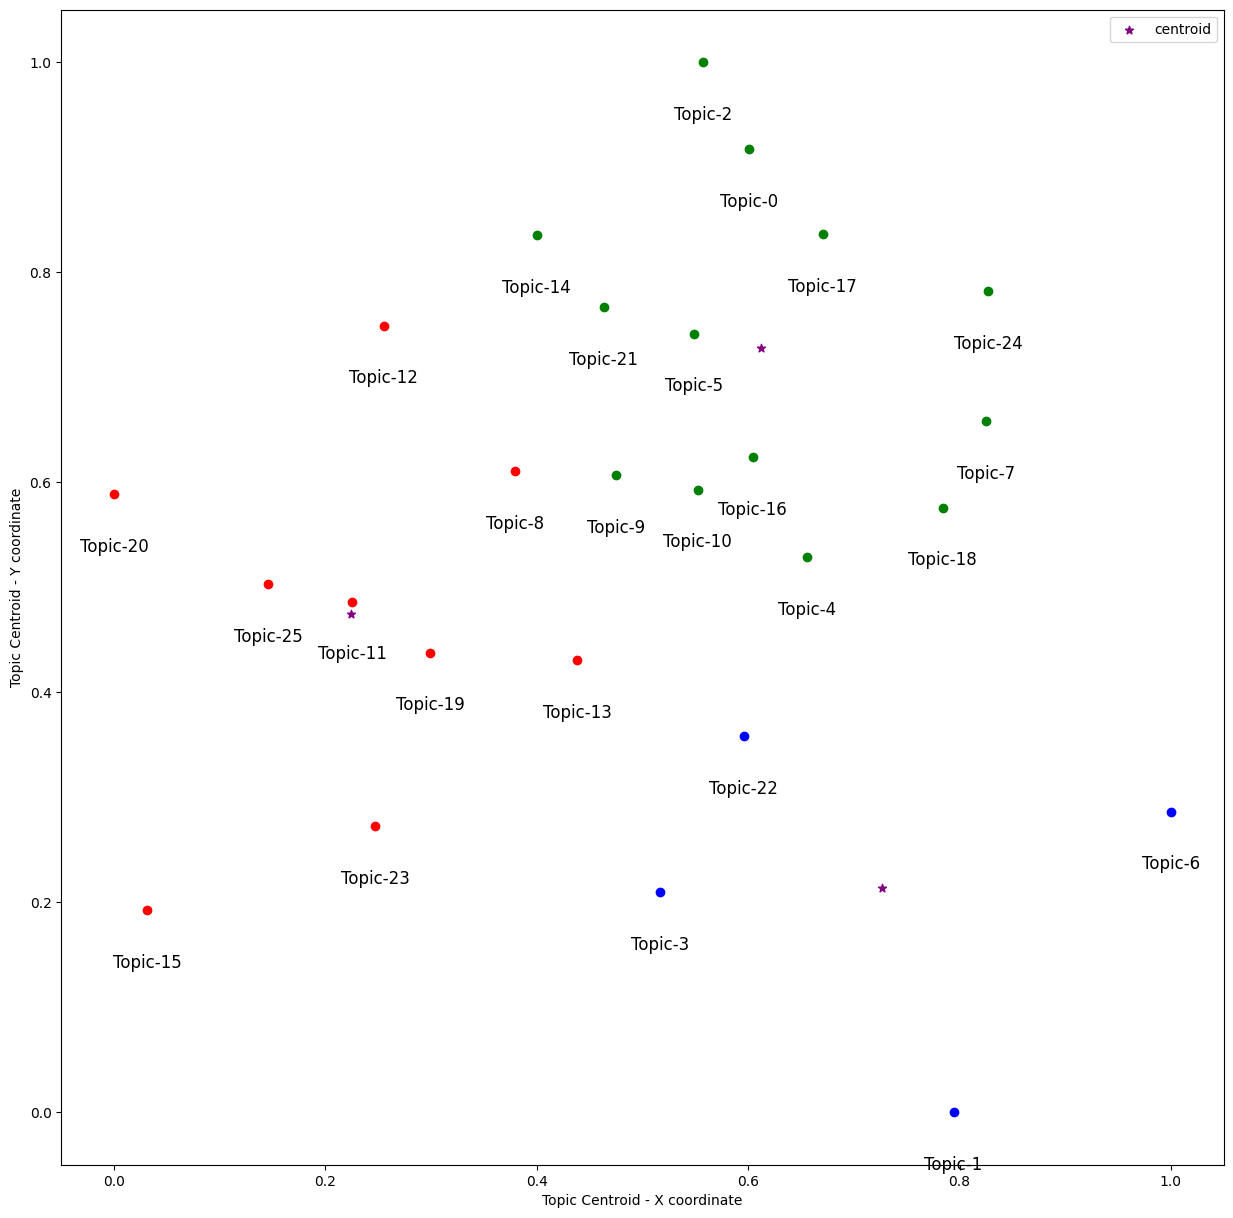

In [198]:
plt.figure(figsize=(15, 15))
x_values_by_cluster, y_values_by_cluster = get_clustered_points()
for i in range(km.n_clusters):
    plt.scatter(x_values_by_cluster[i],
                y_values_by_cluster[i], color=colors[i])

for i, (x, y) in enumerate(zip(x_values, y_values)):
    plt.text(x, y-0.05, 'Topic-'+str(i), fontsize=12, ha='center', va='center')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()
plt.xlabel('Topic Centroid - X coordinate')
plt.ylabel('Topic Centroid - Y coordinate')

In [171]:
# get location of cluster centers
km.cluster_centers_

array([[0.22455594, 0.47451058],
       [0.6125539 , 0.72809637],
       [0.7266857 , 0.21345752]], dtype=float32)

In [203]:
sse = []
k_rng = range(1, 10)
for k in k_rng:
    km = KMeans(n_clusters=k,random_state=42)
    y_predicted = km.fit_predict(data)
    sse.append(km.inertia_)

/home/avisek/work/final-year-project/topic_modeling/env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/avisek/work/final-year-project/topic_modeling/env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/avisek/work/final-year-project/topic_modeling/env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/avisek/work/final-year-project/topic_modeli

findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not

findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not

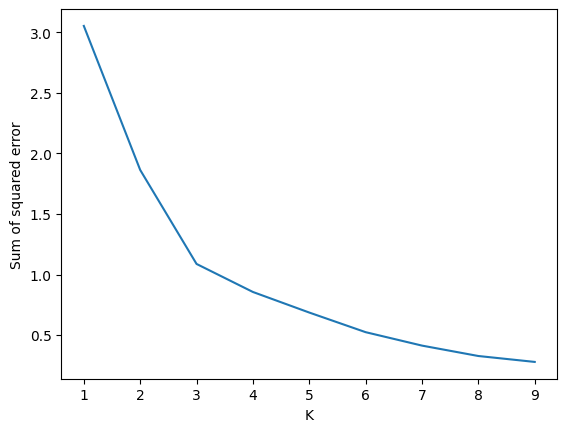

In [204]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)

In [ ]:
# Trying out HDBSCAN now

In [216]:
x_values = x_values.reshape(26,)
y_values = y_values.reshape(26,)

In [219]:
data = np.column_stack((x_values, y_values))

In [221]:
data[0:4]

array([[0.60090435, 0.91759026],
       [0.7943064 , 0.        ],
       [0.55690694, 1.        ],
       [0.5164882 , 0.20956361]], dtype=float32)

In [220]:
import hdbscan

In [227]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)

In [228]:
clusters = clusterer.fit(data)

In [229]:
clusters.__dict__

{'min_cluster_size': 5,
 'min_samples': None,
 'alpha': 1.0,
 'max_cluster_size': 0,
 'cluster_selection_epsilon': 0.0,
 'metric': 'euclidean',
 'p': None,
 'algorithm': 'best',
 'leaf_size': 40,
 'memory': Memory(location=None),
 'approx_min_span_tree': True,
 'gen_min_span_tree': True,
 'core_dist_n_jobs': 4,
 'cluster_selection_method': 'eom',
 'allow_single_cluster': False,
 'match_reference_implementation': False,
 'prediction_data': False,
 '_metric_kwargs': {},
 '_condensed_tree': array([(26,  1, 1.78938569, 1), (26,  6, 2.3762979 , 1),
        (26, 15, 2.51527923, 1), (26, 20, 2.63096382, 1),
        (26,  3, 2.87361232, 1), (26, 24, 3.65918534, 1),
        (26, 22, 3.76272127, 1), (26, 12, 3.78055354, 1),
        (26,  2, 3.8679555 , 1), (26, 25, 3.88783618, 1),
        (26, 23, 3.97205199, 1), (26,  7, 4.23749175, 1),
        (26, 18, 4.30290204, 1), (26, 14, 4.43102342, 1),
        (26, 11, 4.53885444, 1), (26, 17, 4.57195923, 1),
        (26,  0, 4.60169434, 1), (26, 13, 5.

<Axes: >

findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.


findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not

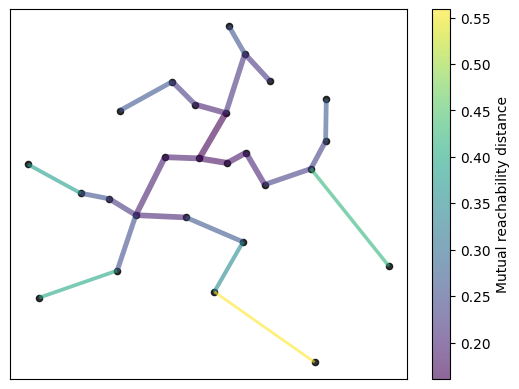

In [231]:
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                      edge_alpha=0.6,
                                      node_size=20,
                                      edge_linewidth=2)

<Axes: ylabel='distance'>

findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not found.
findfont: Font family '0001 ARAP BK Regular' not

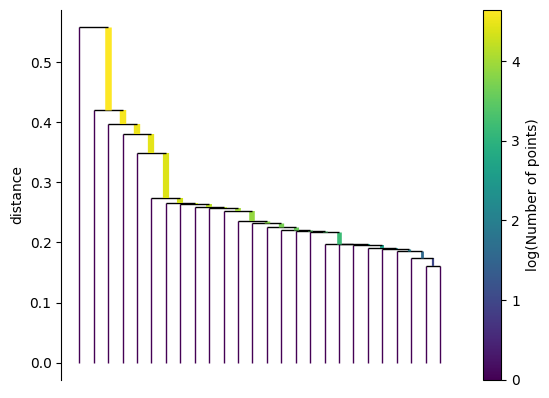

In [232]:
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)